In [0]:
%matplotlib inline
from fastai.basics import *

In this part of the lecture we explain Stochastic Gradient Descent (SGD) which is an **optimization** method commonly used in neural networks. We will illustrate the concepts with concrete examples.

#  Linear Regression problem

The goal of linear regression is to fit a line to a set of points.

In [0]:
n=100

In [3]:
x = torch.ones(n,2) 
x[:,0].uniform_(-1.,1)
x[:5]

tensor([[-0.5882,  1.0000],
        [ 0.8581,  1.0000],
        [ 0.4973,  1.0000],
        [-0.6322,  1.0000],
        [-0.4072,  1.0000]])

In [4]:
a = tensor(3.,2); a

tensor([3., 2.])

In [0]:
y = x@a + torch.rand(n)

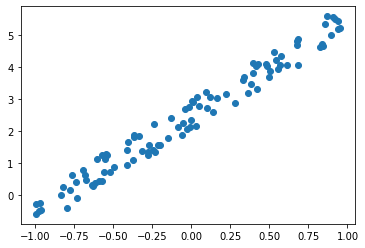

In [6]:
plt.scatter(x[:,0], y);

You want to find **parameters** (weights) `a` such that you minimize the *error* between the points and the line `x@a`. Note that here `a` is unknown. For a regression problem the most common *error function* or *loss function* is the **mean squared error**. 

In [0]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

Suppose we believe `a = (-1.0,1.0)` then we can compute `y_hat` which is our *prediction* and then compute our error.

In [0]:
a = tensor(-1.,1)

In [9]:
y_hat = x@a
mse(y_hat, y)

tensor(7.0391)

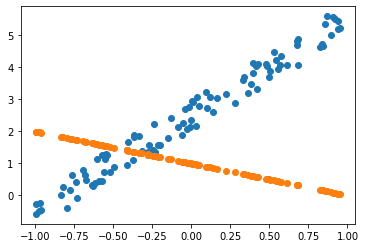

In [10]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat);

So far we have specified the *model* (linear regression) and the *evaluation criteria* (or *loss function*). Now we need to handle *optimization*; that is, how do we find the best values for `a`? How do we find the best *fitting* linear regression.

# Gradient Descent

We would like to find the values of `a` that minimize `mse_loss`.

**Gradient descent** is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved by taking steps in the negative direction of the function gradient.

Here is gradient descent implemented in [PyTorch](http://pytorch.org/).

In [11]:
a = nn.Parameter(a); a # pytorch에서 사용하는 기본 tensor변수인 nn.Parameter를 사용한다.

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [0]:
def update():
    y_hat = x@a
    loss = mse(y, y_hat)
    if t % 10 == 0: print(loss) # 10번마다 loss를 출력한다.
    loss.backward() # derivative 계산
    with torch.no_grad():
        a.sub_(lr * a.grad) # a = a - lr*a.grad
        a.grad.zero_()

In [13]:
lr = 1e-1
for t in range(100): update()

tensor(7.0391, grad_fn=<MeanBackward0>)
tensor(1.5240, grad_fn=<MeanBackward0>)
tensor(0.4797, grad_fn=<MeanBackward0>)
tensor(0.1974, grad_fn=<MeanBackward0>)
tensor(0.1197, grad_fn=<MeanBackward0>)
tensor(0.0982, grad_fn=<MeanBackward0>)
tensor(0.0923, grad_fn=<MeanBackward0>)
tensor(0.0907, grad_fn=<MeanBackward0>)
tensor(0.0902, grad_fn=<MeanBackward0>)
tensor(0.0901, grad_fn=<MeanBackward0>)


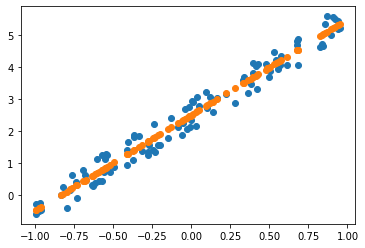

In [14]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],x@a.detach().numpy()); # x@a는 tensor x와 tensor a 사이의 multiplication. # 현재 colab의 pytorch에서는 numpy에러가 나기 때문에, .detach().numpy()를 붙여줘야 에러가 나지않음.

## Animate it!

In [0]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [16]:
a = nn.Parameter(tensor(-1.,1))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], x@a.detach().numpy())
plt.close()

def animate(i):
    update()
    line.set_ydata(x@a.detach().numpy())
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20) # 20ms 마다 계속해서 animation을 반복함. 100번하고 나면 정지.

In practice, we don't calculate on the whole file at once, but we use *mini-batches*.

## Vocab

- Learning rate
- Epoch
- Minibatch
- SGD
- Model / Architecture
- Parameters
- Loss function

For classification problems, we use *cross entropy loss*, also known as *negative log likelihood loss*. This penalizes incorrect confident predictions, and correct unconfident predictions.

# Comment:
## 1. Vocab 정의 정리.
- Learning rate : gradient update하는 정도. 한 번 step마다 gradient와 weight에 곱해서 weight를 update함.
- Epoch : 데이터셋 전체를 한 번 다 training 시키면 1 epoch.
- Minibatch : 데이터셋의 subset이며, full batch로 학습을 시키면 많은 메모리와 계산량이 필요하므로, 일부를 통해서 학습하는 것으로 full batch보다 효율적으로 학습하기 위해 사용함.
- SGD(Stocastic Gradient Descent) : minibatch 단위로 gradient를 update 하면서 loss function이 작아지게끔 parameter를 update하는 방법.
- Model / Architecture : ResNet34, ResNet50 같은 CNN을 부르는 말로써, 데이터를 바라보는 방법이라고 생각하면 된다. Neural Network에 대해서는 NN의 구조(Architecture)가 달라지면 학습 방법이 바뀌므로 ResNet34와 ResNet50은 같은 모델이지만 다른 아키텍쳐를 가지고 있다.
- Parameter : 모델을 결정짓는 변수이며, NN의 학습대상. 여기서는 weight.
- Loss Function : optimization의 target function. 학습한 결과와 실제 결과(supervised의 경우엔)가 얼마나 차이나는지 계산해주는 함수. DNN에서는 보통 cross-entropy function을 사용한다.

## 2. 내용 정리.
- matplotlib을 통해서 SGD가 실제로 어떻게 parameter를 조정하는지 시각적으로 확인할 수 있었다.
- 현재 주어진 task는 Linear Regression으로 비교적 쉬운 task여서 SGD가 수렴하는 것을 쉽게 확인할 수 있었다.
- 실제 DNN에서도 SGD를 optimizer로 많이 활용한다.
- 머신 러닝 기법에서도 loss function의 optimizer로 충분히 활용가능하다. DNN에서는 cross-entropy function의 global minimum을 찾기 위해 사용한다.